# <img src="https://github.com/JuliaLang/julia-logo-graphics/raw/master/images/julia-logo-color.png" height="100" /> _Colab Notebook Template_

## Instructions
1. Work on a copy of this notebook: _File_ > _Save a copy in Drive_ (you will need a Google account). Alternatively, you can download the notebook using _File_ > _Download .ipynb_, then upload it to [Colab](https://colab.research.google.com/).
2. If you need a GPU: _Runtime_ > _Change runtime type_ > _Harware accelerator_ = _GPU_.
3. Execute the following cell (click on it and press Ctrl+Enter) to install Julia, IJulia and other packages (if needed, update `JULIA_VERSION` and the other parameters). This takes a couple of minutes.
4. Reload this page (press Ctrl+R, or ⌘+R, or the F5 key) and continue to the next section.

_Notes_:
* If your Colab Runtime gets reset (e.g., due to inactivity), repeat steps 2, 3 and 4.
* After installation, if you want to change the Julia version or activate/deactivate the GPU, you will need to reset the Runtime: _Runtime_ > _Factory reset runtime_ and repeat steps 3 and 4.

In [7]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.8.2" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools"
JULIA_PACKAGES_IF_GPU="CUDA" # or CuArrays for older Julia versions
JULIA_NUM_THREADS=2
#---------------------------------------------------#

if [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  nvidia-smi -L &> /dev/null && export GPU=1 || export GPU=0
  if [ $GPU -eq 1 ]; then
    JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia  

  echo ''
  echo "Successfully installed `julia -v`!"
  echo "Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then"
  echo "jump to the 'Checking the Installation' section."
fi

Unrecognized magic `%%shell`.

Julia does not use the IPython `%magic` syntax.   To interact with the IJulia kernel, use `IJulia.somefunction(...)`, for example.  Julia macros, string macros, and functions can be used to accomplish most of the other functionalities of IPython magics.


# Checking the Installation
The `versioninfo()` function should print your Julia version and some other info about the system:

In [8]:
versioninfo()

Julia Version 1.8.2
Commit 36034abf260 (2022-09-29 15:21 UTC)
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 2 × AMD EPYC 7B12
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-13.0.1 (ORCJIT, znver2)
  Threads: 2 on 2 virtual cores
Environment:
  LD_LIBRARY_PATH = /usr/local/nvidia/lib:/usr/local/nvidia/lib64
  JULIA_NUM_THREADS = 2


# Ciclos

Es muy común que, al programar, necesitemos implementar alguno de los siguientes procesos:
* repetir una secuencia de instrucciones mientras cierta condición se cumpla,
* aplicar una misma secuencia de instrucciones para cada elemento de un arreglo,
* ejecutar una serie de instrucciones _recursivamente_; es decir, que una de las instrucciones de la serie sea volver a ejecutar toda la serie de instrucciones.

En la mayoría de los lenguajes de programación, estas funcionalidades están implementadas a través de **ciclos**. Dado que en los primeros dos procesos se _itera_ sobre una condición o sobre los elementos de un arreglo, respectivamente, se conocen como ciclos **iterativos**, mientras que el tercero se conoce como un ciclo **recursivo**. 

## Ciclos iterativos

### Ciclos `while` (_while loops_)

Los ciclos que ejecutan repetidamente una secuencia de instrucciones _mientras_ cierta condición se cumpla se conocen como ciclos _while_. Su sintáxis en Julia es la siguiente:

$\color{green}{\textbf{while }} \text{condition}$

$\quad \quad \text{block}$

$\color{green}{\textbf{end}}$

Al ejecutar este código:
1. Julia evualará la expresión $\text{condition}$.
1. Si $\text{condition}$ se evalúa a `true`, ejecutará el bloque de código $\text{block}$ y regresará al paso 1.
1. Si $\text{condition}$ se evalúa a `false`, **no** ejecutará el bloque de código $\text{block}$ **ni tampoco** volverá al paso 1, sino que seguirá ejecutando las instrucciones debajo de $\color{green}{\textbf{end}}$ (de haberlas).

Observa que, para que Julia pueda llegar al paso 3 y terminar de ejecutar el ciclo _while_, es necesario que el bloque de código $\text{block}$ **modifique (eventualmente) el valor de** $\text{condition}$; ¡de lo contrario, la serie de instrucciones en $\text{block}$ se ejecutará infinitamente! Si llegamos a pedirle a la computadora que **ejecute un proceso infinito**, deberemos reiniciar nuestro _kernel_ para poder seguir trabajando.

Un ejemplo de un ciclo _while_ bien implementado (es decir, finito) es el siguiente:

In [9]:
x = 0          # Asignamos el valor 0 a una variable 'x'.

while x <= 10  # Iniciamos un ciclo que se repetirá mientras x
               # tenga un valor menor o igual a 10.
    println(x) # Imprimimos el valor de 'x'.
    x += 1     # ¡Aumentamos el valor de 'x' para que el ciclo termine
               # eventualmente y no se haga un proceso infinito!
end

0
1
2
3
4
5
6
7
8
9
10


mientras que dos ejemplos de ciclos _while_ **mal implementados** (es decir, infinitos) son los siguientes:

In [ ]:
x = 0          # Asignamos el valor 0 a una variable 'x'.

while x <= 10  # Iniciamos un ciclo que se repetirá mientras x
               # tenga un valor menor o igual a 10.
    println(x) # Imprimimos el valor de 'x'.
               # No modificamos el valor de 'x', ¡así que siempre valdrá 0 
end            # y el ciclo se volverá a ejecutar infinitamente!

In [ ]:
x = 0          # Asignamos el valor 0 a una variable 'x'.

while x <= 10  # Iniciamos un ciclo que se repetirá mientras x
               # tenga un valor menor o igual a 10.
    println(x) # Imprimimos el valor de 'x'.
    x -= 1     # Modificamos el valor de 'x', ¡pero no de forma que
               # eventualmente la condición no se cumpla!
end

Una aplicación muy importante de los ciclos _while_ es para repetir un cálculo numérico hasta que éste tenga la precisión que deseamos. Como de costumbre, la precisión se determina como el valor absoluto de la diferencia entre el valor que obtenemos (el resultado del cálculo) y el valor que esperamos (o bien, el valor exacto), por lo que un ejemplo de pseudocódigo que usa un ciclo while de esta manera se vería como sigue:

$\varepsilon = 0.1 \quad \quad \quad \quad \quad \quad \color{blue}{\text{# Definimos la cota mínima de precisión que queremos.}}$

$\text{p} = 3 \ \ \ \quad \quad \quad \quad \quad \quad \color{blue}{\text{# Asignamos un valor a nuestra variable.}}$

$\color{green}{\textbf{while }} \text{abs}(\pi-\text{p}) > \varepsilon \quad \color{blue}{\text{# Mientras no se tenga la precisión deseada...}}$

$\quad \quad \text{block} \ \ \ \quad \quad \quad \quad \color{blue}{\text{# Cálculos que deriven en una reasignación del valor de}}$

$\ \ \ \quad \quad \quad \quad \quad \quad \quad \quad \color{blue}{\text{# la variable p y lo acerquen al valor de } \pi}.$

$\color{green}{\textbf{end}}$

Usaremos los ciclos _while_ de esta forma frecuentemente cuando veamos métodos numéricos.

**Ejercicio** Implementa un código que aproxime la épsilon de máquina para `Float64` **sin utilizar la función `eps`**.

In [20]:
#Podemos ir partiendo un valor pequeño hasta que sea el mínimo, sin que la suma sea mayor al siguiente entero 

x = 1.0 #escribimos sólo números Float64
while 1.0 + x/5.0 > 1.0
    x /= 2.0
end
print(x)  

4.440892098500626e-16

### Ciclos `for` (_for loops_)

Los ciclos que aplican una misma secuencia de instrucciones _para_ cada elemento de un arreglo se conocen como ciclos _for_. Su sintáxis en Julia es la siguiente:

$\color{green}{\textbf{for }} \text{variable } \color{magenta}{\textbf{in }} \text{array}$

$\quad \quad \text{block}$

$\color{green}{\textbf{end}}$

Al ejecutar este código:
1. Julia tomará el primer valor del arreglo $\text{array}$ y se lo asignará a una variable $\text{variable}$.
1. Julia ejecutará el bloque de código $\text{block}$, **el cual puede utilizar a la variable** $\text{variable}$.
1. Julia tomará el siguiente valor del arreglo $\text{array}$ y se lo asignará a una variable $\text{variable}$.
1. Julia repetirá los pasos 2 y 3 hasta que no queden valores en el arreglo por asignar.

Algunos ejemplos de ciclos _for_ que utilizan a las variables a las cuales se les asignan los valores del arreglo son los siguientes:

In [1]:
A = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for x in A     # Para cada elemento de A, asignamos su valor a 'x'

    println(x) # e imprimimos el valor asignado a 'x'.
    
end

0
1
2
3
4
5
6
7
8
9
10


In [2]:
sum = 0

for n in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
    
    sum += 1 / ( n*(n+1) )
    
end

sum

0.9374999999999999

Observa que el primer ejemplo de ciclo _for_ es totalmente equivalente al primer ciclo _while_ que vimos en este _notebook_, mientras que el segundo ciclo _for_ es la suma parcial con los primeros 15 términos de la serie

$$\sum_{n=1}^\infty \frac{1}{(n(n+1))},$$

la cual es igual a $1$, como mencionamos en el _notebook_ [`1.2-Sistemas_numéricos_de_punto_flotante_y_error_numérico.ipynb`](./1.2-Sistemas_numéricos_de_punto_flotante_y_error_numérico.ipynb); observa qué sucede si agregas más valores del índice $n$ en el arreglo, o si quitas algunos valores. 

Un ejemplo de un ciclo _for_ que **no** utiliza a las variables creadas con elementos del arreglo es el siguiente ciclo "de afuera" en la siguiente expresión:

In [3]:
A = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for y in ['a', "Hola", 3.7]

    for x in A     # Para cada elemento de A, asignamos su valor a 'x'

        println(x) # e imprimimos el valor asignado a 'x'.

    end
    
end

0
1
2
3
4
5
6
7
8
9
10
0
1
2
3
4
5
6
7
8
9
10
0
1
2
3
4
5
6
7
8
9
10


#### Rangos

Como has observado, es común utilizar ciclos _for_ con arreglos de números espaciados uniformemente. A estos se les conocen como _rangos_. En Julia, tienen la siguiente sintáxis:

$$\color{green}{\text{a}}\color{magenta}{\textbf{:}}\color{green}{\text{b}}\color{magenta}{\textbf{:}}\color{green}{\text{c}}$$

Al ejecutar este código:
1. Julia creará un arreglo que tenga a $\color{green}{\text{a}}$ como su primer entrada.
2. Después, agregará una nueva entrada al arreglo sumándole $\color{green}{\text{b}}$ al valor de su última entrada.
3. Repetirá el paso 2 hasta que la suma de $\color{green}{\text{b}}$ con el valor de su última entrada sea mayor a $\color{green}{\text{c}}$; el valor mayor a $\color{green}{\text{c}}$ **no** será incluido en el arreglo.

El siguiente ejemplo utiliza un rango como arreglo en un ciclo _for_ e imprime a los elementos del rango:

In [5]:
for x in 1:0.2:5.1
    
    println(x)
    
end

1.0
1.2
1.4
1.6
1.8
2.0
2.2
2.4
2.6
2.8
3.0
3.2
3.4
3.6
3.8
4.0
4.2
4.4
4.6
4.8
5.0


Si escribimos un rango de la forma

$$\color{green}{\text{a}}\color{magenta}{\textbf{:}}\color{green}{\text{c}}$$

Julia asumirá que la diferencia entre los elementos del arreglo es $1$. El siguiente ejemplo usa un rango para calcular la suma parcial de la serie mencionada anteriormente:

In [6]:
sum = 0

for n in 1:6
    
    sum += 1 / ( n*(n+1) )
    
end

sum

0.8571428571428572

Observemos que esta forma equivalente de calcular la suma parcial tiene la ventaja de ser más legible y más fácil de modificar; para obtener la suma de los primeros $n$ términos, sólo debemos cambiar el número de la derecha del rango.

Si recuerdas, en el _notebook_ [`1.3-Tipos_de_datos_de_texto_y_arreglos.ipynb`](./1.3-Tipos_de_datos_de_texto_y_arreglos.ipynb) utilizamos arreglos de índices para acceder a subarreglos de un arreglo, por ejemplo:

In [7]:
[1, 3, 5, 7, 9][[1,3,5]]

3-element Vector{Int64}:
 1
 5
 9

En particular, podemos usar rangos como arreglos de índices para este fin:

In [8]:
[1, 3, 5, 7, 9][1:2:5]

3-element Vector{Int64}:
 1
 5
 9

Por esto es que, cuando sólo ponemos el símbolo `:` sin especificar los parámetros del rango de índices, Julia lo interpreta como _todo el rango de índices posible_. Así es como pudimos, por ejemplo, obtener vectores columna y vectores renglón de una matriz:

In [9]:
[1 2 3 ; 4 5 6 ; 7 8 9][3,:]
#= Devuelve un arreglo con todos los índices posibles de columna
   para el índice 3 de renglón =#

3-element Vector{Int64}:
 7
 8
 9

In [10]:
[1 2 3 ; 4 5 6 ; 7 8 9][:,2]
#= Devuelve un arreglo con todos los índices posibles de renglón
   para el índice 2 de columna =#

3-element Vector{Int64}:
 2
 5
 8

#### Creación de arreglos _por comprensión_

En teoría de conjuntos, podemos describir a un conjunto _por extensión_

$$A = \{ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 \}$$

o _por comprensión_

$$A = \{ x \in \mathbb{N} \mid 1 \leq x \leq 10 \},$$

es decir, especificando qué propiedad deben cumplir los elementos del conjunto _en vez de_ enumerarlos a todos.

En Julia, hemos visto que podemos crear arreglos por extensión

In [11]:
A = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

10-element Vector{Int64}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10

e, implícitamente, que los rangos son una manera de crear arreglos por comprensión

In [12]:
B = 1:10

1:10

In [13]:
A == B

true

Los rangos nos pueden a ayudar a definir arreglos por comprensión de maneras más interesantes. Por ejemplo, el conjunto

$$ C = \{1, 4, 9, 16, 25\} = \{ x^2 \mid x\in\mathbb{N} \land 1\leq x\leq 5 \}  $$

puede ser implementado con el arreglo

In [14]:
C = [ x^2 for x in 1:5 ]

5-element Vector{Int64}:
  1
  4
  9
 16
 25

Incluso podemos utilizar declaraciones condicionales dentro de la propiedad que los elementos deben cumplir para pertenecer al arreglo, por ejemplo:

In [15]:
D = [ x^2 for x in -10:10 if (x >= 1 && x <= 5) ]

5-element Vector{Int64}:
  1
  4
  9
 16
 25

In [16]:
C == D

true

A este tipo de expresiones en Julia se les conoce como _comprehensions_, y su sintáxis general es la siguiente:

$$\text{expression } \color{green}{\textbf{for }} \text{variable } \color{magenta}{\textbf{in }} \text{range } \color{green}{\textbf{if }} \text{condition}$$

donde $\text{expression}$ es una expresión que define a los elementos del arreglo, $\text{variable}$ es una variable que _puede_ aparecer en $\text{expression}$, y la declaración condicional $\color{green}{\textbf{if }} \text{condition}$ es opcional.

Podemos utilizar un _comprehension_ donde la variable del ciclo _for_ **no** aparezca en la expresión que define a los elementos para definir un arreglo con una cantidad arbitraria de entradas con el mismo valor:

In [17]:
[1 for x in 1:10]

10-element Vector{Int64}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1

## Ciclos recursivos

Los ciclos que ejecutan una serie de instrucciones _recursivamente_ se conocen como _ciclos recursivos_. Recordemos que, en Julia, podemos definir una secuencia de instrucciones como una **función**, cuya sintáxis general es la siguiente:

$\color{green}{\textbf{function }} \color{blue}{\text{nombre}} \text{(argumento1, ... , argumentoN=valor_predeterminado})$

$\quad \quad \text{bloque de instrucciones}$

$\color{green}{\textbf{end}}$

donde los argumentos y sus valores predeterminados son opcionales (es decir, podemos definir funciones sin argumentos). En particular, ¡el código en $\text{bloque de instrucciones}$ puede contener una llamada a la misma función $\color{blue}{\text{nombre}}$! Esto nos puede servir para crear ciclos recursivos como, por ejemplo, la función factorial:

In [18]:
function fact(x)
    
    if x == 0
        
        return 1
        
    else
        
        return x*fact(x-1)
        
    end
    
end

fact(5)

120

In [19]:
Int32(0.5)

LoadError: ignored

Observemos que esta función falla para datos de tipo flotante con decimales no nulos pues, en este caso, nunca se verifica la condición `x == 0`, por lo que la recursividad de la función es infinita. Para especificar que la función sólo se ejecute cuando su argumento es de tipo `Int`, podemos incluir `x::Int` en su argumento en vez de sólo `x`. Más aún, esta función puede ejecutarse para datos de tipo `Int16`, `Int32`, `Int64`, `UInt16`, etcétera, los cuales están englobados en un tipo de datos llamado `Integer`.

**Ejercicio** Crea una función llamada `miFactorial` que tome un argumento de tipo `Integer`, imprima el `String` `"Error: la función miFactorial no se puede ejecutar con valores negativos."` si el argumento es menor a cero, y devuelva el factorial del argumento si es mayor o igual que cero.

In [22]:
function mi_Factorial(n::Int)
    if n < 0
        println("Error: la función miFactorial no se puede ejecutar con valores negativos.")
    else
        factorial = 1  #incicio
        for i in 1:n
            factorial = factorial * i
        end
        print(factorial)
    end
end

mi_Factorial (generic function with 1 method)

In [23]:
mi_Factorial(5) #comprobar funciona 

120

**Nota** La función factorial ya está definida en Julia con el nombre `factorial`, por lo que no tenemos que definir una nueva función cada vez que queramos usarla.

In [21]:
factorial(5)

120

## Visualización de ciclos con... ¡tortugas!

Imaginemos que tenemos una tortuga en el origen de un plano cartesiano que tiene una pluma pegada, la cual puede poner sobre el papel o bien levantar, y que esta tortuga entiende sólo cuatro instrucciones:
* camina hacia adelante un número $d$ de unidades de distancia,
* gira $\theta$ grados,
* levanta la pluma y
* baja la pluma.

Si le pedimos que camine hacia adelante mientras tiene la pluma abajo (i.e. sobre el papel), dibujará una línea recta, mientras que, si le pedimos que camine cuando tiene la pluma arriba (i.e. levantada), no dibujará nada. La tortuga tampoco dibujará nada si le pedimos que gire, pues asumiremos que, aún con la pluma abajo, la marca es tan pequeña que no se alcanza a ver. 

Observa que, con las cuatro instrucciones anteriores (y la cooperación de la tortuga, por supuesto) pordemos dibujar **cualquier figura bidimensional compuesta únicamente por líneas rectas**. En serio, **piénsalo**.

### Dibujando líneas con tortugas en Julia

Afortunadamente, existe un programa que hace exactamente lo que acabamos de describir. Está incluido dentro de la biblioteca [`ThinkJulia`](https://github.com/BenLauwens/ThinkJulia.jl), creado como recurso didáctico del libro "Think Julia: How to Think Like a Computer Scientist" de Ben Lauwens (puedes encontrar la versión en línea del libro [aquí](https://benlauwens.github.io/ThinkJulia.jl/latest/book.html#_turtles)). Instalemos e importemos esta biblioteca:

In [22]:
using Pkg                                                  # Importamos la biblioteca "Pkg" para poder instalar "paquetes" (blbiotecas);
Pkg.add(url="https://github.com/BenLauwens/ThinkJulia.jl") # luego, instalamos la biblioteca "ThinkJulia".

     Cloning git-repo `https://github.com/BenLauwens/ThinkJulia.jl`
    Updating git-repo `https://github.com/BenLauwens/ThinkJulia.jl`
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed FFMPEG ──────────────────── v0.3.0
   Installed JpegTurbo_jll ───────────── v2.1.91+0
   Installed IrrationalConstants ─────── v0.1.1
   Installed Showoff ─────────────────── v0.3.2
   Installed x265_jll ────────────────── v3.5.0+0
   Installed ColorTypes ──────────────── v0.9.1
   Installed Adapt ───────────────────── v3.6.1
   Installed GeometryTypes ───────────── v0.8.5
   Installed OffsetArrays ────────────── v1.12.9
   Installed Plots ───────────────────── v1.0.14
   Installed ImageCore ───────────────── v0.8.22
   Installed libfdk_aac_jll ──────────── v2.0.2+0
   Installed TikzPictures ────────────── v3.4.2
   Installed Graphite2_jll ───────────── v1.3.14+0
   Installed libass_jll ──────────────── v0.15.1+0
   Installed Libmount_jll ─────────

In [6]:
using ThinkJulia                                           # Importamos la biblioteca "ThinkJulia".

#= NOTA: Después de instalar la biblioteca "ThinkJulia" localmente en tu computadora, podrás importarla sin tener que
volverla a instalar; por ende, recomendamos comentar la celda de código anterior después de la instalación inicial,
pues ya no será necesaria =#

[ Info: Precompiling ThinkJulia [a7f2b756-c18b-4c7f-87da-faca9ac81b29]
[ Info: Skipping precompilation since __precompile__(false). Importing ThinkJulia [a7f2b756-c18b-4c7f-87da-faca9ac81b29].


En la siguiente celda, usamos la función `Turtle` para inicializar nuestra tortuga en el origen del plano cartesiano y luego mostramos un ejemplo con las cuatro instrucciones que podemos darle. Como existe un caracter [`Unicode`](https://es.wikipedia.org/wiki/Unicode) de tortuga que podemos usar para nombrar variables con Julia, lo usaremos para definir a nuestra tortuga, por pura diversión; este caracter se obtiene escribiendo `\:turtle:` en una celda de código de Julia y auto completando con la tecla `TAB`.

Ejecuta la siguiente celda, experimenta cambiando el valor de distancia `d` y comentando alguna o varias líneas del bloque `begin`, y observa cómo cambia el dibujo que haces con la tortuga. ¿Hacia dónde mira la tortuga al inicio? ¿La convención de grados que sigue la tortuga es igual a la convención matemática usual en el plano cartesiano?

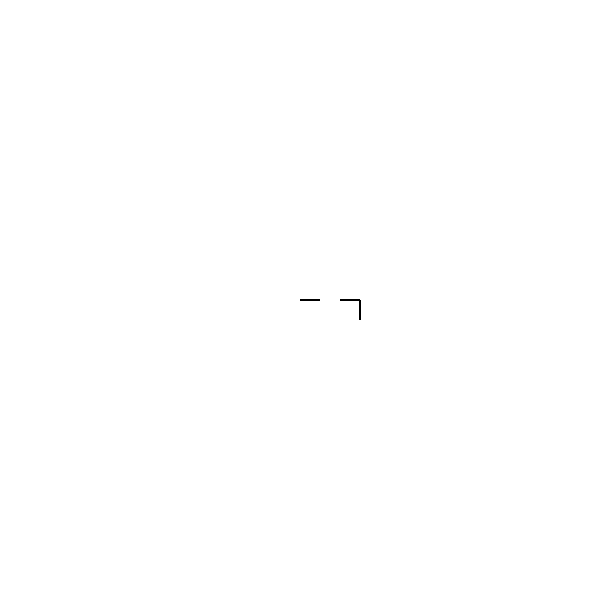

In [8]:
🐢 = Turtle() #Inicializamos nuestra tortuga en el origen del plano.

d = 20

@svg begin           # '@svg' toma las instrucciones dentro del bloque `begin` y genera un svg con ellas, que Jupyter nos muestra
    forward(🐢,d)
    penup(🐢)
    forward(🐢,d)
    pendown(🐢)
    forward(🐢,d)
    turn(🐢, 90)
    forward(🐢,d)
end

  ¿Hacia dónde mira la tortuga al inicio? ¿La convención de grados que sigue la tortuga es igual a la convención matemática usual en el plano cartesiano?: Corrí éste notebook en Colab y no me aparece la tortuga, sin embargo, dependerá del signo de d, de acuerdo al plano cartesiano, hacia dónde mirará en un primer instante. No sigue la convención del plano cartesiano, dependerá de a dónde esté mirando la tortuga, que definirá un nuevo "plano cartesiano" en esa posición que definirá el ángulo, sin embargo, aún con eso, le pusimos un giro de 90° que usualmente sería hacia "arriba" pero lo tomó hacia abajo, toma los grados hacia la derecha.

**Ejercicio** Dibuja una línea punteada con 5 líneas negras de 10 unidades de distancia cada una con 10 unidades de distancia entre ellas. (Sugerencia: copia el código de la celda anterior y modifícalo a tu conveniencia.)

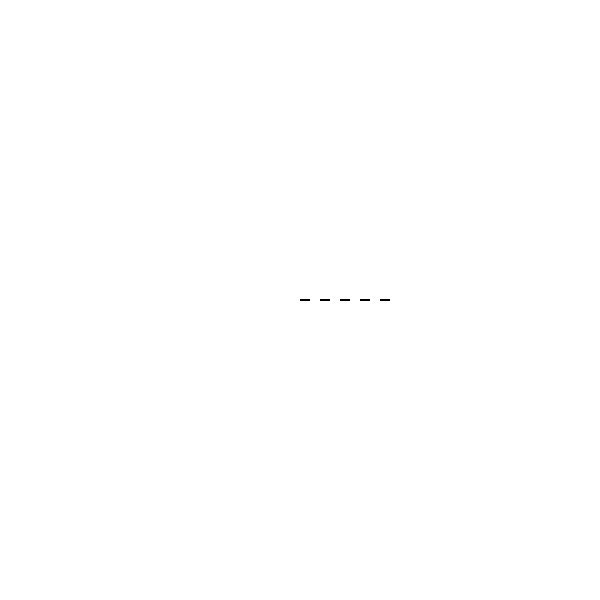

In [9]:
🐢 = Turtle() # Inicializamos nuestra tortuga en el origen del plano.
d = 10
@svg begin # '@svg' toma las instrucciones dentro del bloque `begin` y genera un svg con ellas, que Jupyter nos muestra
    for i = 1:5 #de una vez podemos usar un for para indicar que son 5 líneas
        forward(🐢,d) #marca la línea
        penup(🐢) #levanta la pluma
        forward(🐢,d) #avanza sin marcar, es decir, hace un espacio de 10 unidades
        pendown(🐢) #volvemos a poner la pluma para que reinice el ciclo con la pluma pintando.
    end 
end

**Ejercicio** Si no utilizaste un ciclo para resolver el ejercicio anterior, reescribe tu programa utilizando un ciclo `for` o `while`.

In [10]:
# Tu código comentado va aquí :D
#sí lo hice con for :)

**Ejercicio** Haz un programa que tome tres parámetros `n`, `d1` y `d2` (los cuales puedes definir como variables en la misma celda) y dibuje `n` líneas de longitud `d1` con una distancia de separación `d2` entre ellas utilizando un ciclo `for` o `while`.

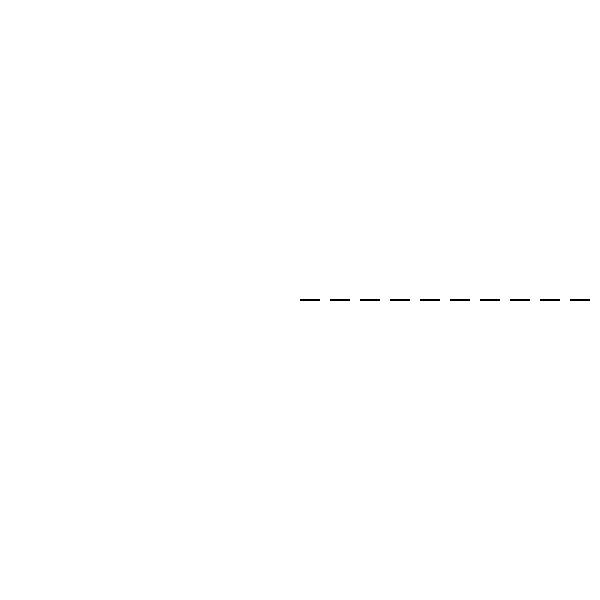

In [11]:
🐢 = Turtle() # Inicializamos nuestra tortuga en el origen del plano.
n = 10
d1 = 20
d2 = 10
@svg begin # '@svg' toma las instrucciones dentro del bloque `begin` y genera un svg con ellas, que Jupyter nos muestra
    for i = 1:n #de una vez podemos usar un for para indicar que son 5 líneas
        forward(🐢,d1) #marca la línea
        penup(🐢) #levanta la pluma
        forward(🐢,d2) #avanza sin marcar, es decir, hace un espacio de 10 unidades
        pendown(🐢) #volvemos a poner la pluma para que reinice el ciclo con la pluma pintando.
    end 
end

**Ejercicio** Haz un programa que dibuje un triángulo equilátero de lado `d`.

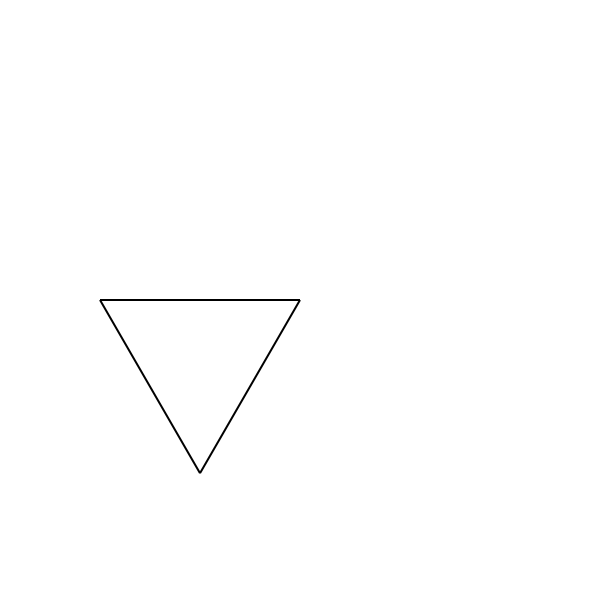

In [12]:
🐢 = Turtle() # Inicializamos nuestra tortuga en el origen del plano.
d = 200
@svg begin # '@svg' toma las instrucciones dentro del bloque `begin` y genera un svg con ellas, que Jupyter nos muestra
    for i = 1:3 #3 porque el triángulo tiene 3 lados
        turn(🐢, 120) #ya que el ángulo entre las aristas de un triángulo equilatero es 60° (ándulos internos), entonces los ángulos externos son de 120°
        forward(🐢,d) #marca la línea
       
    end 
end

**Ejercicio** Generaliza el programa anterior a uno que tome dos parámetros `n` y `d` y dibuje un polígono regular de `n` lados de longitud `d` utilizando un ciclo `for` o `while`.

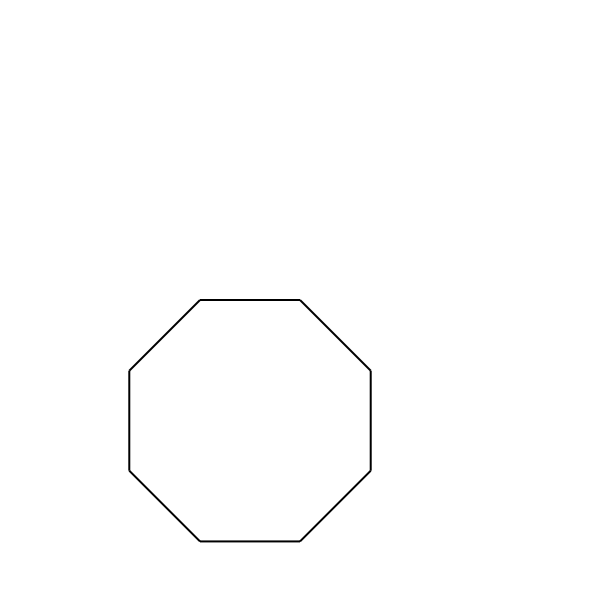

In [24]:
🐢 = Turtle() # Inicializamos nuestra tortuga en el origen del plano.
d = 100
n= 8
ang = (n-2)*180/n #Buscamos la expresión general para los ángulos internos de un polígono de n lados, y obtenemos ésta
@svg begin # '@svg' toma las instrucciones dentro del bloque `begin` y genera un svg con ellas, que Jupyter nos muestra
    for i = 1:n
        turn(🐢, 180-ang)
        forward(🐢, d)
    end
end

### Tortugas y fractales

Podemos utilizar ciclos recursivos para dibujar fractales (o al menos una linda aproximación de ellos) con ayuda de nuestra amiga tortuga.

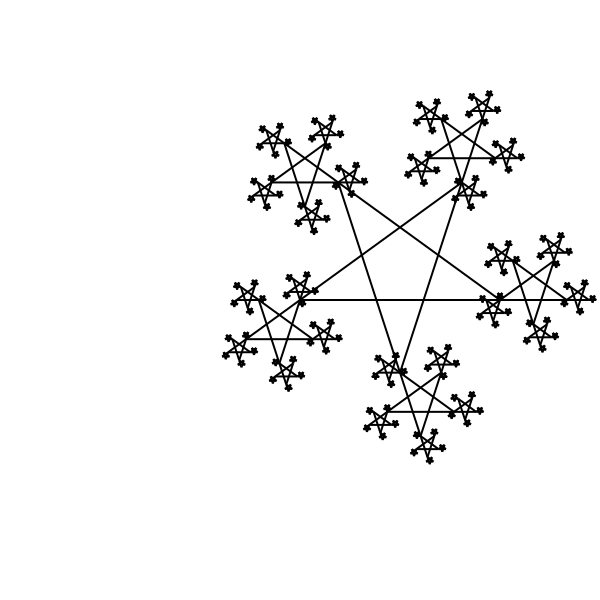

In [14]:
function estrella(tort,dist)
    if dist <= 5
        return
    else
        for i in 1:5
            forward(tort,dist)
            estrella(tort,dist/3)
            turn(tort,216)
        end
    end
end

🐢 = Turtle() #Inicializamos nuestra tortuga en el origen del plano.

d = 200

@svg estrella(🐢,d) 

**Ejercicio** Crea un fractal con un ciclo recursivo.

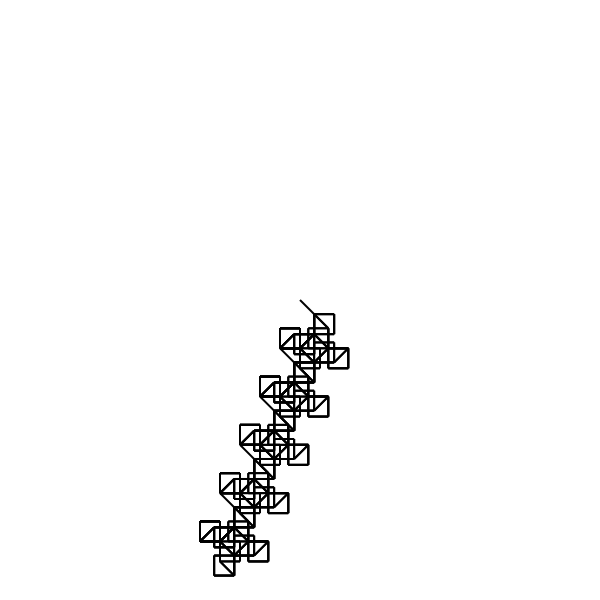

In [19]:
function mi_fractal(tort,dist)
    n= 8
    d=20
    angulo = (n-2)*180/n
    if dist <= 5
        return
    else
        for i in 1:5
            turn(🐢, 180-angulo)
            forward(🐢, d)
            mi_fractal(tort,dist/3)
            turn(tort,180-angulo)
        end
    end
end

🐢 = Turtle() #Inicializamos nuestra tortuga en el origen del plano.

d = 200

@svg mi_fractal(🐢,d) 

**¡Concurso!** Cuando esta tarea se haya entregado, haremos un concurso grupal en el cual los fractales más creativos serán recompensados con décimas extra en el rubro de tareas, ¡así que echa a volar tu imaginación!

### Dato curioso

El _software_ de la biblioteca `ThinkJulia` que acabamos de utilizar está basado en la biblioteca [`turtle`](https://docs.python.org/3/library/turtle.html) de Python la cual, a su vez, está basada en el lenguaje de programación educativo [`Logo`](https://en.wikipedia.org/wiki/Logo_(programming_language)) creado en 1967.

## Recursos complementarios
* [Manual de ciclos en Julia](https://docs.julialang.org/en/v1/manual/control-flow/#man-loops).